In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import statistics

plt.style.use('phd_thesis')

In [32]:
folder = '~/workspace/claws_phaseI/claws_calibration/SystematicsStudy/'

# Run 900122 - 1000 mV Muon Run

In [33]:
inf_900122 = 'systematics_results_Run-900122_full_run.csv'

In [34]:
df_900122 = pd.read_csv(folder+inf_900122)
df_900122.tail()

,Unnamed: 0,WaveformDecomposition.stop_methode,WaveformDecomposition.stop_region,WaveformDecomposition.threshold,WaveformDecomposition.fwhm,WaveformDecomposition.search_range,WaveformDecomposition.search_edge,MipTimeRetrieval.window_threshold,MipTimeRetrieval.window_length,MipTimeRetrieval.timing_type,MipTimeRetrieval.constant_fraction,MipTimeRetrieval.pe_hit_time,SystematicsStudy.threshold_tres,SystematicsStudy.range_time,MPV_1,MPV_2,MPV_3,MPV_4,TRes,TRes_shift
17275,17275,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.5,10,0.394159,0.366676,0.369423,0.260528,1.366060,-0.114005
17276,17276,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,4,0.394159,0.366676,0.369423,0.260528,1.053474,-0.242250
17277,17277,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,6,0.394159,0.366676,0.369423,0.260528,1.059739,-0.247404
17278,17278,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,8,0.394159,0.366676,0.369423,0.260528,1.059453,-0.247265
17279,17279,2.0,5.0,4.5,8.0,1000.0,200.0,3.0,36.0,pe hit time,0.5,3,0.7,10,0.394159,0.366676,0.369423,0.260528,1.059453,-0.247265


In [35]:
df_900122['WaveformDecomposition.threshold'].describe()

count    17280.000000
mean         2.500000
std          1.414254
min          0.500000
25%          1.500000
50%          2.500000
75%          3.500000
max          4.500000
Name: WaveformDecomposition.threshold, dtype: float64

In [36]:
df_900122 = df_900122.drop(['Unnamed: 0','WaveformDecomposition.stop_methode','WaveformDecomposition.stop_region','WaveformDecomposition.search_range','WaveformDecomposition.search_edge'], axis=1)

In [37]:
df_900122.columns

Index(['WaveformDecomposition.threshold', 'WaveformDecomposition.fwhm',
       'MipTimeRetrieval.window_threshold', 'MipTimeRetrieval.window_length',
       'MipTimeRetrieval.timing_type', 'MipTimeRetrieval.constant_fraction',
       'MipTimeRetrieval.pe_hit_time', 'SystematicsStudy.threshold_tres',
       'SystematicsStudy.range_time', 'MPV_1', 'MPV_2', 'MPV_3', 'MPV_4',
       'TRes', 'TRes_shift'],
      dtype='object')

In [38]:
df_900122 = df_900122.rename(index=str, columns={'WaveformDecomposition.threshold': 'WFD.Thres.', 'WaveformDecomposition.fwhm': 'WFD.FWHM','MipTimeRetrieval.window_threshold':'MIPT.Thres.','MipTimeRetrieval.window_length':'MIPT.Window','MipTimeRetrieval.constant_fraction':'MIPT.CF','MPV_1':'MPV FWD1','MPV_2':'MPV FWD2','MPV_3':'MPV FWD3','MPV_4':'MPV FWD4','TRes_shift':'TRes. Shift','TRes':'TRes.'})

In [39]:
# Physical values
df_900122 = df_900122[(df_900122['TRes.']>=0) & (df_900122['TRes.']<=1000)]

In [40]:
df_900122 = df_900122[df_900122['SystematicsStudy.threshold_tres']== 0.5]
df_900122 = df_900122.drop(['SystematicsStudy.threshold_tres'], axis=1)

In [41]:
df_900122 = df_900122[df_900122['SystematicsStudy.range_time']== 4]
df_900122 = df_900122.drop(['SystematicsStudy.range_time'], axis=1)

### Make the full scan plot

<Figure size 418x418 with 0 Axes>

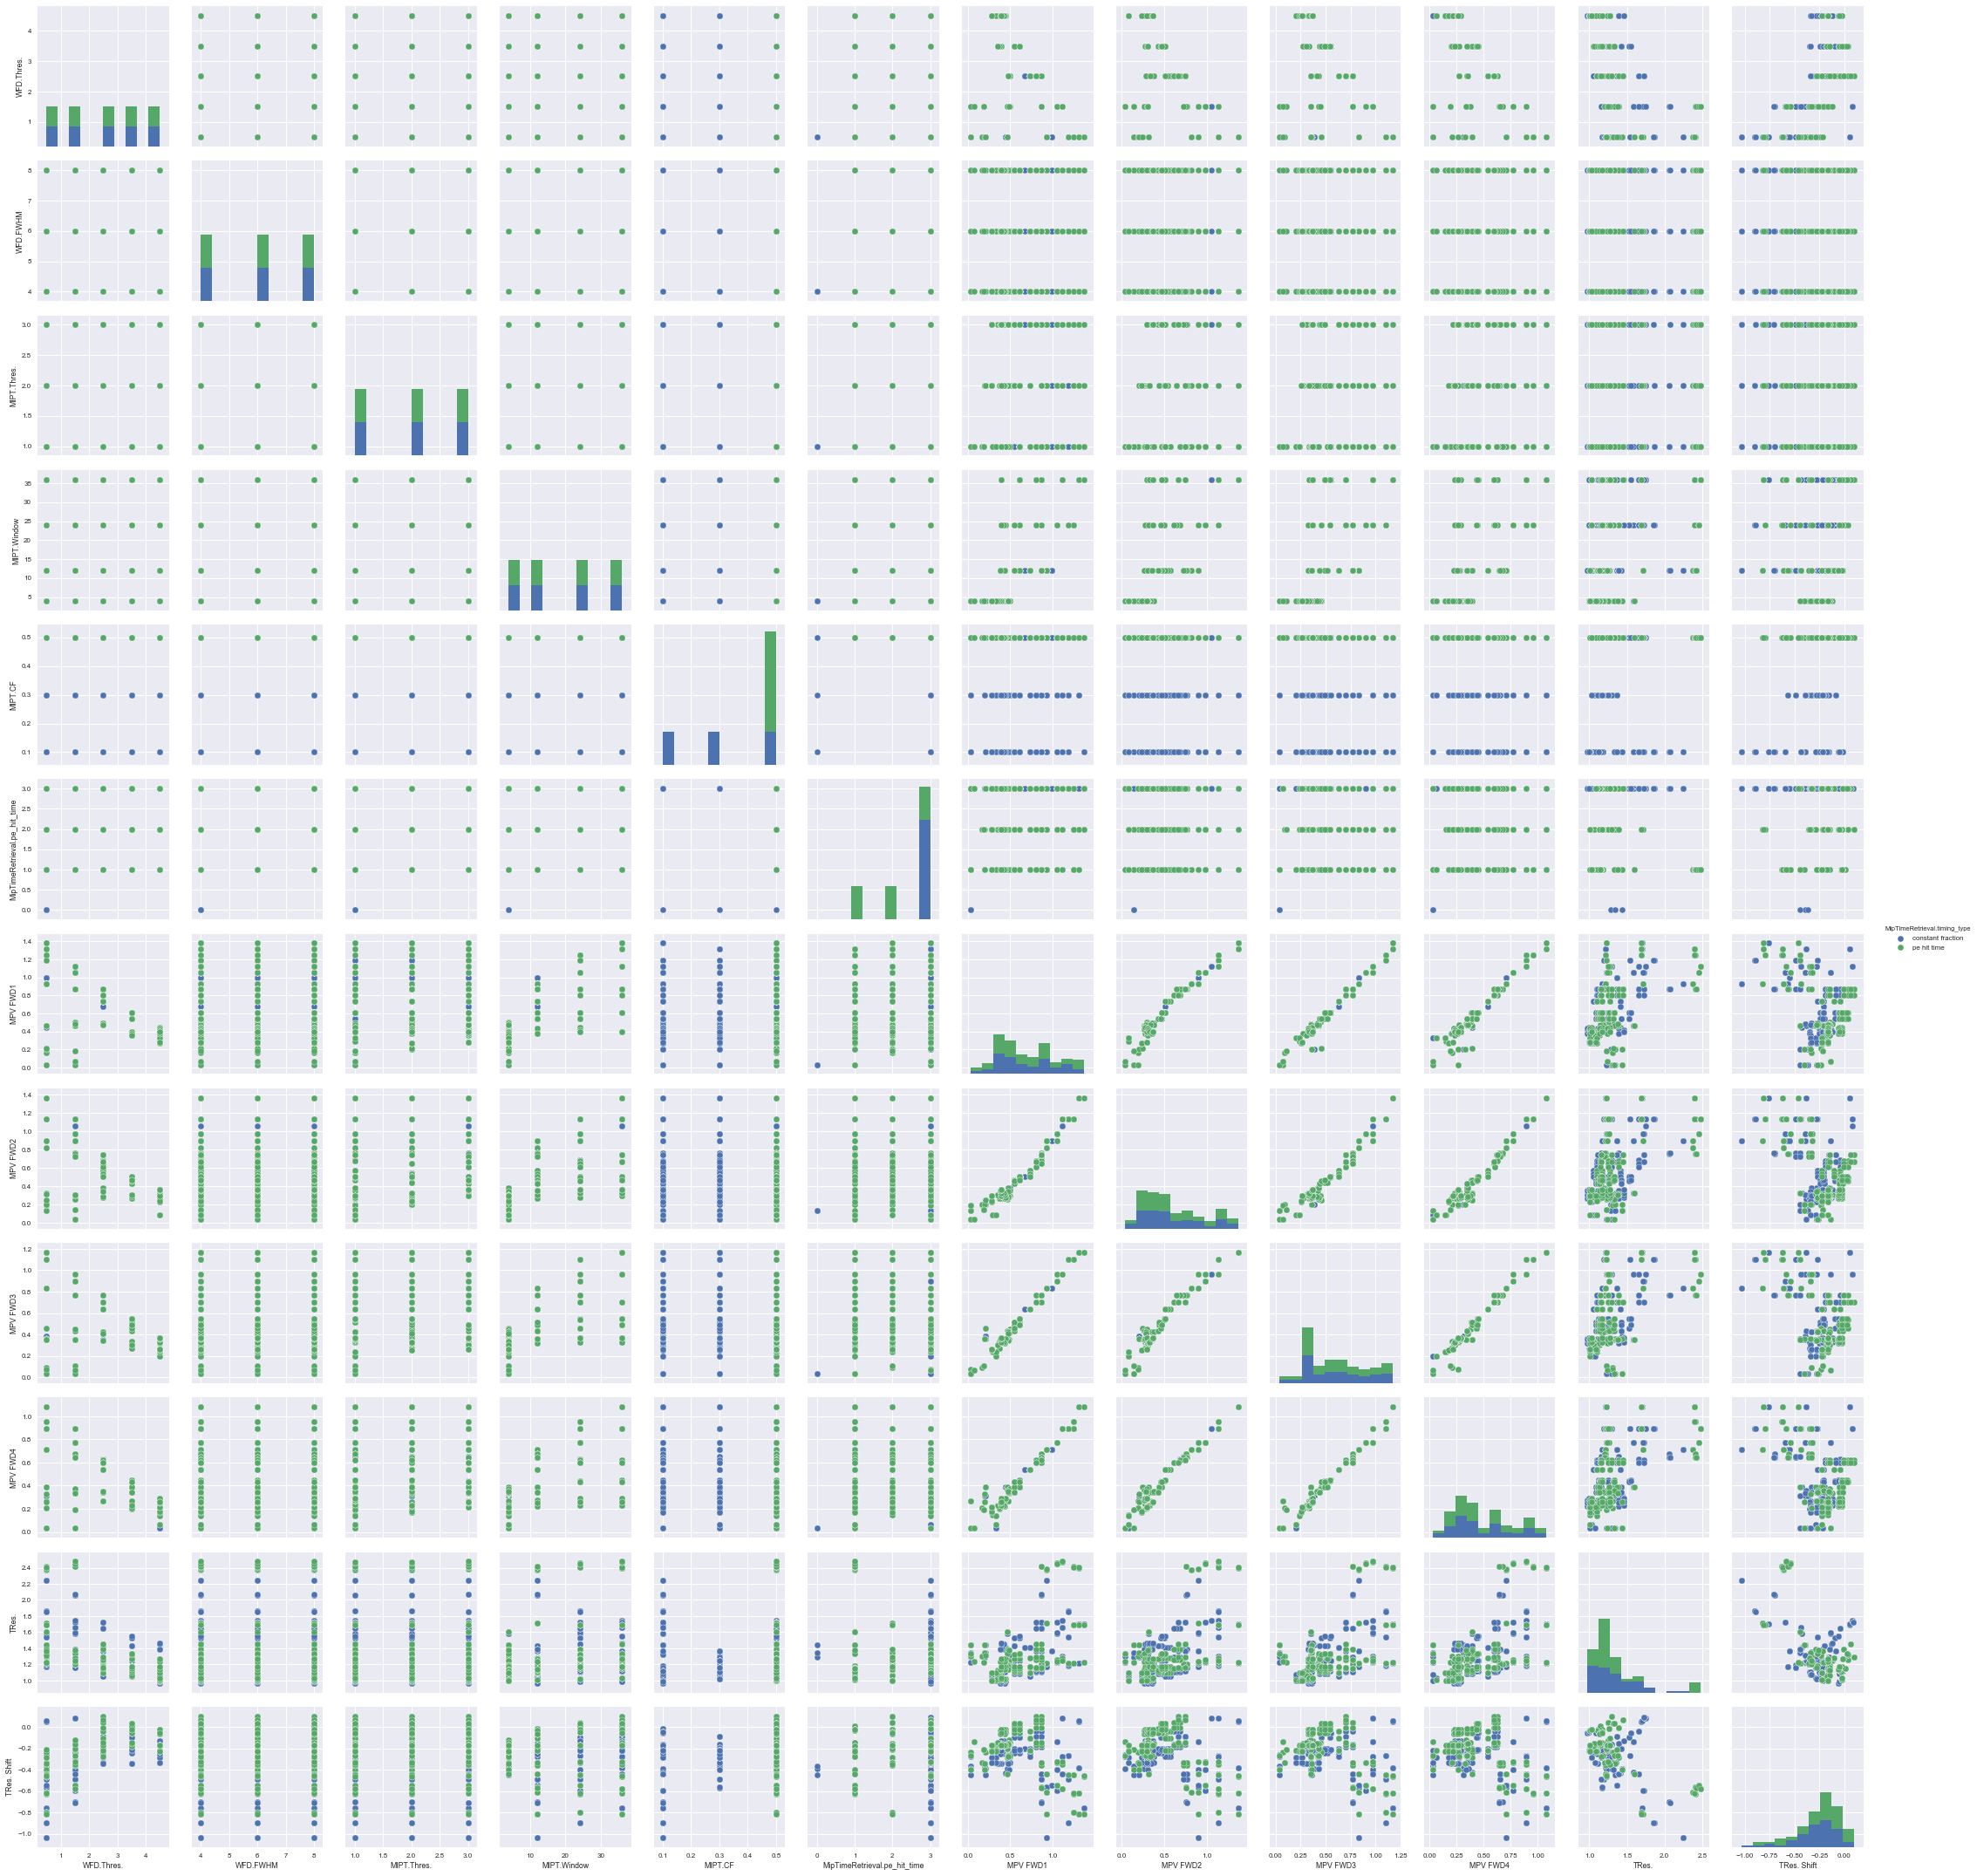

In [43]:
plt.figure(figsize=(5.8055602,5.8055602))
#sns.pairplot(data=df,hue="Survived", dropna=True)2-Copy1
sns.pairplot(data=df_900122, hue='MipTimeRetrieval.timing_type')
plt.savefig(inf_900122[:-4]+'_pairplot.pdf', bbox_inches='tight')

### Fix to constant fraction and drop it

In [44]:
df_900122 = df_900122[df_900122['MipTimeRetrieval.timing_type']== 'constant fraction']
df_900122 = df_900122.drop(['MipTimeRetrieval.timing_type', 'MipTimeRetrieval.pe_hit_time'], axis=1)

In [45]:
df_900122.columns

Index(['WFD.Thres.', 'WFD.FWHM', 'MIPT.Thres.', 'MIPT.Window', 'MIPT.CF',
       'MPV FWD1', 'MPV FWD2', 'MPV FWD3', 'MPV FWD4', 'TRes.', 'TRes. Shift'],
      dtype='object')

In [46]:
df_900122['WFD.FWHM'].describe()

count    540.000000
mean       6.000000
std        1.634507
min        4.000000
25%        4.000000
50%        6.000000
75%        8.000000
max        8.000000
Name: WFD.FWHM, dtype: float64

In [47]:
# fig =plt.figure(figsize=(16,8))
# ax = fig.add_subplot(121)
# df_900122.plot(x='WaveformDecomposition.threshold',y='MPV_1', ax = ax, style='o', label='MPV_1 vs WFD Threshold', alpha=.5)
# ax.set_xlabel('WaveformDecomposition.threshold')
# ax.set_ylabel('MPV_1')
# plt.legend()
# ax2 = fig.add_subplot(122)
# df_900122.plot(x='SystematicsStudy.threshold_tres',y='TRes', ax = ax2, style='o', label='Tres vs SystematicsStudy.threshold_tres', ylim=(0,3))
# ax2.set_xlabel('SystematicsStudy.threshold_tres')
# ax2.set_ylabel('TRes')
# plt.legend()
# plt.savefig(inf_900122[:-4]+'_MPV_1VsWDThres.pdf')

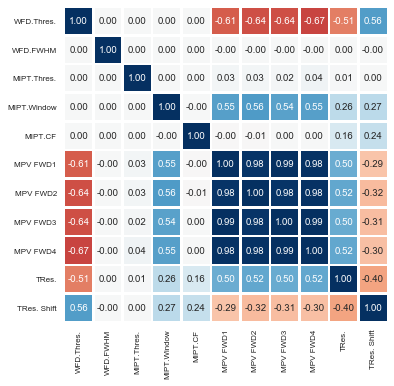

In [48]:
plt.figure(figsize=(5.8055602,5.8055602))
#plt.axis('tight')
sns.set(font_scale=0.8)
# sns.palplot(sns.color_palette("coolwarm"))
sns.heatmap(df_900122.corr(), annot=True, fmt=".2f",cmap = "RdBu", cbar=False, center=0, linewidths=1.5)
#sns.heatmap(df_900122.corr(), annot=True, fmt=".2f",cmap = sns.diverging_palette(0, 20, n=21), center=0, cbar=False)
# left = 10
# bottom = 0.05 
# width = 0.9
# height = 0.9
# ax = fig.add_axes([left, bottom, width, height])
plt.savefig(inf_900122[:-4]+'_heatmap.pdf', bbox_inches='tight')

### Do some data cleaning

In [25]:
# Time
df_900122 = df_900122[(df_900122['TRes.']>=0) & (df_900122['TRes.']<=3)]
#df_900122 = df_900122[(df_900122['SystematicsStudy.threshold_tres']<=0.5)]

In [26]:
# MPV
low = 0.5
up = 1.5
df_900122 = df_900122[(df_900122['MPV FWD1']>= low)&(df_900122['MPV FWD1']<= up)&(df_900122['MPV FWD2']>= low)&(df_900122['MPV FWD2']<= up)&(df_900122['MPV FWD3']>= low)&(df_900122['MPV FWD3']<= up)&(df_900122['MPV FWD4']>= low)& (df_900122['MPV FWD4'] <= up)]

In [27]:
#df_900122['MipTimeRetrieval.window_length'].unique()

In [28]:
df_900122 = df_900122[df_900122['MIPT.Window']== 36]

In [29]:
df_tmp = df_900122[df_900122['MIPT.Window']== 36]

print('TRes summary: ')
print(df_tmp['TRes.'].describe())
print('')
print('TRes_shift summary: ')
print(df_tmp['TRes. Shift'].describe())
print('')
print('MPV FWD1 summary: ')
print(df_tmp['MPV FWD1'].describe())
print('')
print('MPV FWD2 summary: ')
print(df_tmp['MPV FWD2'].describe())
print('')
print('MPV FWD3 summary: ')
print(df_tmp['MPV FWD3'].describe())
print('')
print('MPV FWD4 summary: ')
print(df_tmp['MPV FWD4'].describe())
print('')
print('Minimum time resolution:')
print( df_tmp.ix[df_tmp['TRes.'].idxmin()] )
print('')

mpvs = []
for i in range(1,5):
    mpvs.append(df_tmp.ix[df_tmp['TRes.'].idxmin()]['MPV FWD'+str(i)])
    
print('Mean correction factor:' + str(statistics.mean(mpvs)))
print('Std of correction factor:' + str(statistics.stdev(mpvs)))

TRes summary: 
count    81.000000
mean      1.502385
std       0.237771
min       1.114287
25%       1.300436
50%       1.653931
75%       1.703876
max       1.743754
Name: TRes., dtype: float64

TRes_shift summary: 
count    81.000000
mean     -0.207745
std       0.271056
min      -0.758253
25%      -0.383824
50%      -0.158273
75%       0.056748
max       0.090483
Name: TRes. Shift, dtype: float64

MPV FWD1 summary: 
count    81.000000
mean      1.100345
std       0.203973
min       0.801200
25%       0.865302
50%       1.121712
75%       1.314020
max       1.378123
Name: MPV FWD1, dtype: float64

MPV FWD2 summary: 
count    81.000000
mean      1.069398
std       0.271509
min       0.664305
25%       0.742430
50%       1.133055
75%       1.367430
max       1.367430
Name: MPV FWD2, dtype: float64

MPV FWD3 summary: 
count    81.000000
mean      0.944533
std       0.192354
min       0.700089
25%       0.700089
50%       0.966755
75%       1.166755
max       1.166755
Name: MPV FWD3, dty

/home/iwsatlas1/mgabriel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/iwsatlas1/mgabriel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


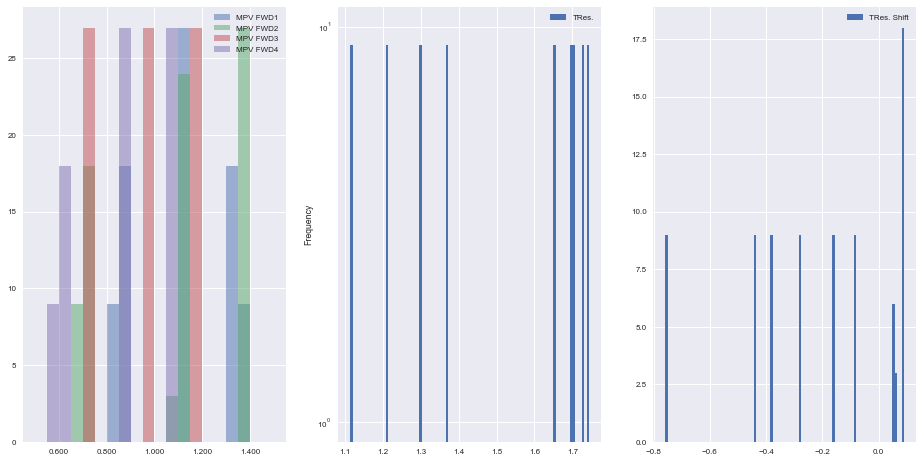

In [173]:
fig =plt.figure(figsize=(16,8))
ax = fig.add_subplot(131)
bins=20
df_900122['MPV FWD1'].hist(ax = ax, label='MPV FWD1', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV FWD2'].hist(ax = ax, label='MPV FWD2', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV FWD3'].hist(ax = ax, label='MPV FWD3', alpha=.5,range=(low,up), bins=bins)
df_900122['MPV FWD4'].hist(ax = ax, label='MPV FWD4', alpha=.5,range=(low,up), bins=bins)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax2 = fig.add_subplot(132)
df_900122['TRes.'].plot(kind='hist', ax = ax2, label='TRes.', bins=100, logy=True)
#ax2.get_yaxis().get_major_formatter().set_useOffset(False)
#ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

ax3 = fig.add_subplot(133)
df_900122['TRes. Shift'].hist(ax = ax3, label='TRes. Shift', bins=100)
#ax3.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.legend()

plt.savefig(inf_900122[:-4]+'_results.pdf')

# Make plots

In [106]:
df_900122_mpv = df_900122.drop(['TRes','TRes_shift', 'SystematicsStudy.range_time','SystematicsStudy.threshold_tres','MipTimeRetrieval.pe_hit_time','MipTimeRetrieval.constant_fraction'], axis=1)

In [112]:
df_900122_mpv.columns

Index(['WaveformDecomposition.threshold', 'WaveformDecomposition.fwhm',
       'MipTimeRetrieval.window_threshold', 'MipTimeRetrieval.window_length',
       'MipTimeRetrieval.timing_type', 'MPV_1', 'MPV_2', 'MPV_3', 'MPV_4'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

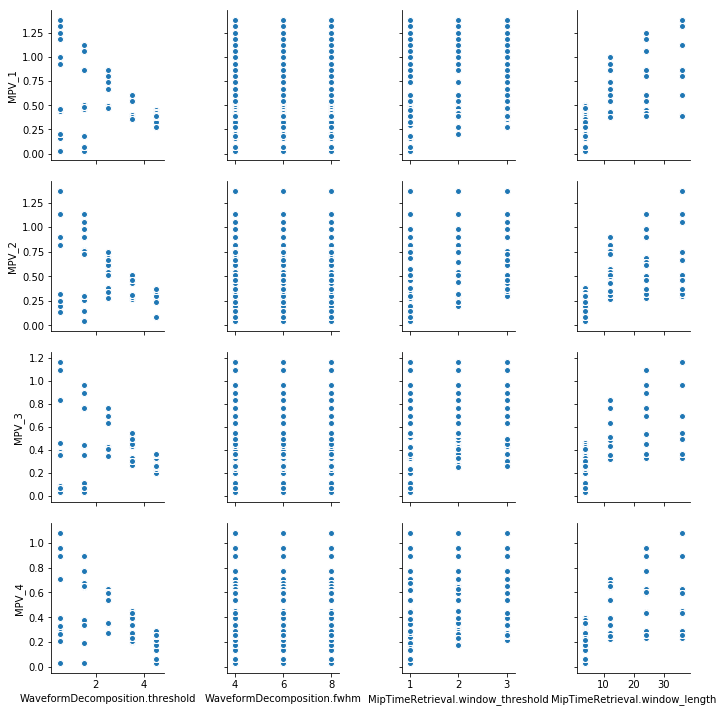

In [116]:
plt.figure()
#sns.pairplot(data=df,hue="Survived", dropna=True)2-Copy1
sns.pairplot(data=df_900122_mpv, x_vars=['WaveformDecomposition.threshold','WaveformDecomposition.fwhm','MipTimeRetrieval.window_threshold', 'MipTimeRetrieval.window_length'], y_vars=['MPV_1','MPV_2','MPV_3','MPV_4'])
plt.savefig(inf_900122[:-4]+'_pairplot_mpv.pdf')

In [108]:
df_900122_time = df_900122.drop(['MPV_1','MPV_2','MPV_3','MPV_4'], axis=1)

<Figure size 432x288 with 0 Axes>

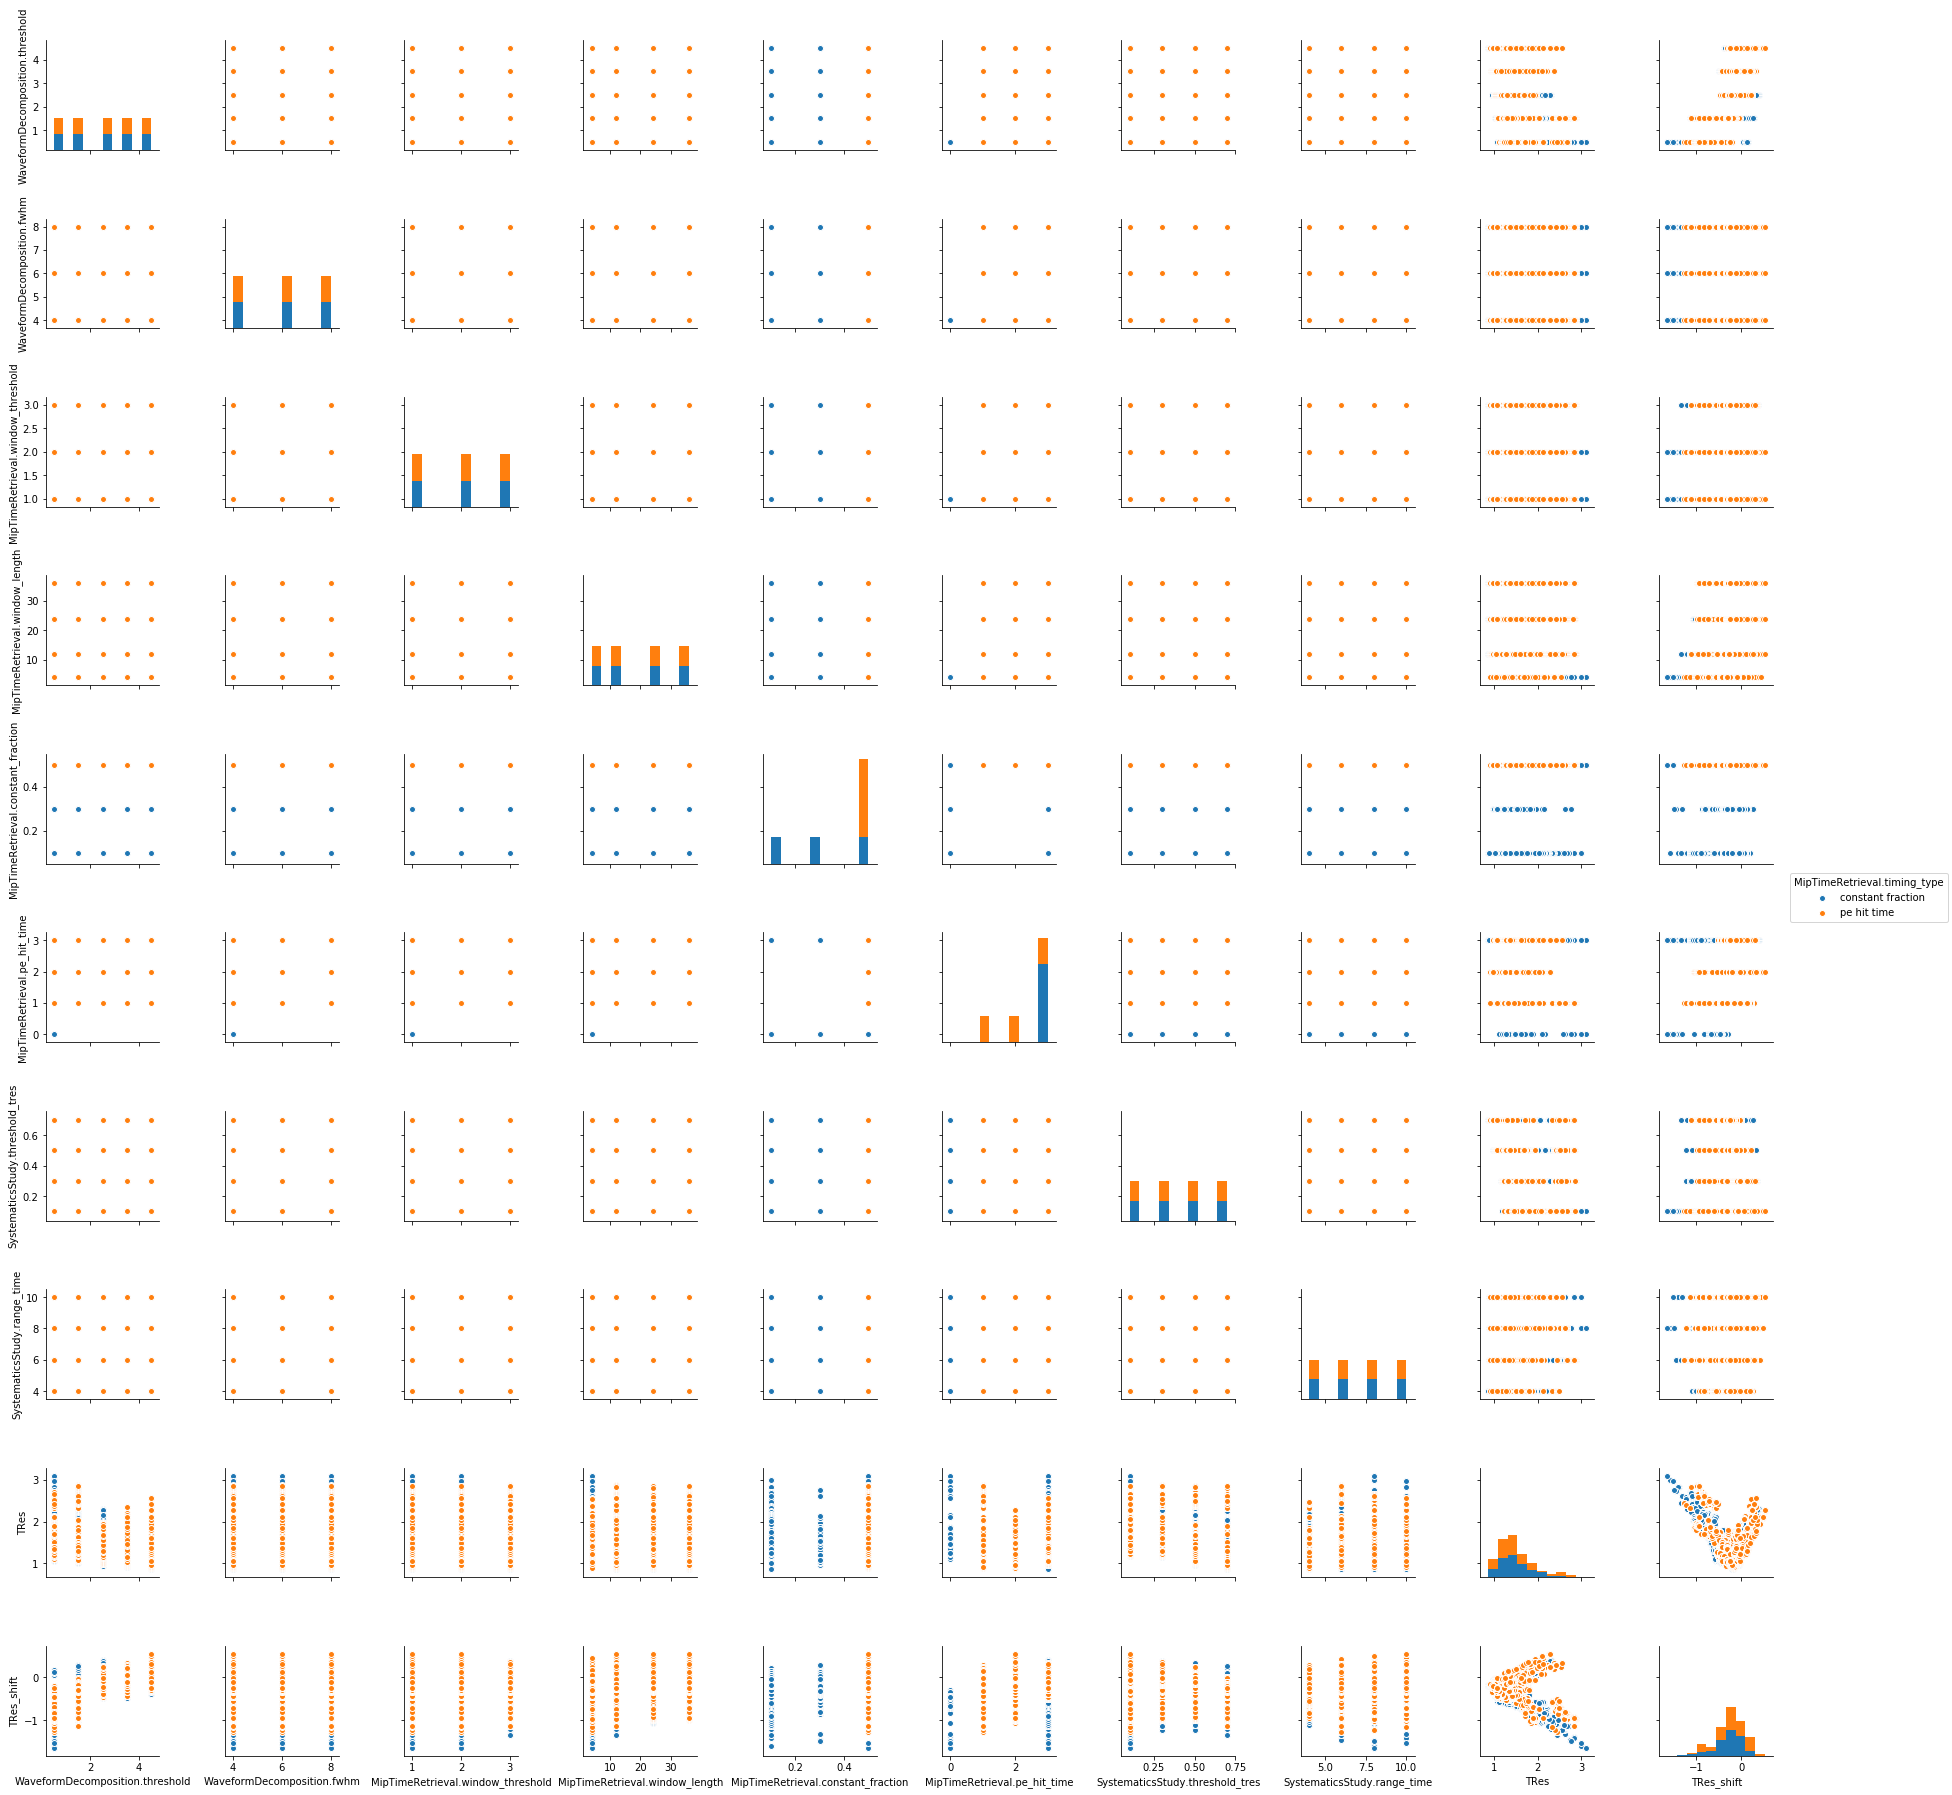

In [110]:
plt.figure()
#sns.pairplot(data=df,hue="Survived", dropna=True)2-Copy1
sns.pairplot(data=df_900122_time, hue='MipTimeRetrieval.timing_type')
plt.savefig(inf_900122[:-4]+'_pairplot_time.pdf')